# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [1]:
import pandas as pd

In [2]:
import psycopg2

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
cursor.execute(sql_str)
tables_data = [a for a in cursor.fetchall()]
conn.commit()
print("Какие таблицы содержатся в Postgres: %s" % tables_data)

Какие таблицы содержатся в Postgres: [('hr_dataset',), ('production_staff',), ('recruiting_costs',), ('salary_grid',)]


In [3]:
df = pd.read_sql_query("select * from hr_dataset limit 5;", conn)
df.head()

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [4]:
df.columns

Index(['id', 'Employee Name', 'Employee Number', 'marriedid',
       'maritalstatusid', 'genderid', 'empstatus_id', 'deptid', 'perf_scoreid',
       'age', 'Pay Rate', 'state', 'zip', 'dob', 'sex', 'maritaldesc',
       'citizendesc', 'Hispanic/Latino', 'racedesc', 'Date of Hire',
       'Days Employed', 'Date of Termination', 'Reason For Term',
       'Employment Status', 'department', 'position', 'Manager Name',
       'Employee Source', 'Performance Score'],
      dtype='object')

In [5]:
df = pd.read_sql_query("select * from production_staff limit 5;", conn)
df.head()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0,0,0,0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0,0,0,0


In [6]:
df = pd.read_sql_query("select * from recruiting_costs;", conn)
df.head()

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['id', 'Employment Source', 'January ', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Total'],
      dtype='object')

In [8]:
df = pd.read_sql_query("select * from salary_grid limit 5;", conn)
df.head()

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


Посчитаем количество сотрудников привлеченных по разным источникам. И найдем отнощение затрат на источник привлечения к количеству сотрудиков. Что бы узнать наиболее выгодные источники привлечения сотрудников.

In [9]:
best_res = pd.read_sql_query("""SELECT "Employee Source", COUNT("Employee Source"),
                (SELECT "Total" FROM recruiting_costs
                WHERE recruiting_costs."Employment Source" = hr_dataset."Employee Source" ), 
                ((SELECT "Total" FROM recruiting_costs
                WHERE recruiting_costs."Employment Source" = hr_dataset."Employee Source" )/
                COUNT("Employee Source"))as employee_cost
                FROM hr_dataset
                JOIN recruiting_costs
                ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
                GROUP BY hr_dataset."Employee Source"
                ORDER BY COUNT("Employee Source") DESC, employee_cost;""", conn)
best_res.head(5)

,Employee Source,count,Total,employee_cost
0,Employee Referral,31,0,0
1,Diversity Job Fair,29,10021,345
2,Search Engine - Google Bing Yahoo,25,5183,207
3,Monster.com,24,5760,240
4,Pay Per Click - Google,21,3509,167


Посмотрим на успеваемость в зависимости от источника наёма работника

In [10]:
perf_by_source = pd.read_sql_query("""SELECT "Performance Score", COUNT("Performance Score"), 
        "Employee Source"
        FROM hr_dataset
        GROUP BY "Performance Score", "Employee Source"
        ORDER BY COUNT("Performance Score") DESC;""", conn)
perf_by_source.head(10)

,Performance Score,count,Employee Source
0,Fully Meets,19,Search Engine - Google Bing Yahoo
1,Fully Meets,16,Employee Referral
2,Fully Meets,15,Monster.com
3,Fully Meets,14,Diversity Job Fair
4,Fully Meets,12,Pay Per Click - Google
5,Fully Meets,10,Billboard
6,Fully Meets,10,Newspager/Magazine
7,Fully Meets,9,Glassdoor
8,Fully Meets,9,Vendor Referral
9,Fully Meets,9,On-campus Recruiting


Проанализируем успеваемость на работе по полу

In [11]:
perf = pd.read_sql_query("""SELECT "Performance Score", COUNT("Performance Score"), sex
        FROM hr_dataset
        GROUP BY "Performance Score", sex
        ORDER BY COUNT("Performance Score") DESC;""", conn)
perf.head(10)

,Performance Score,count,sex
0,Fully Meets,101,Female
1,Fully Meets,80,Male
2,N/A- too early to review,26,Female
3,90-day meets,19,Female
4,Exceeds,16,Female
5,90-day meets,12,Male
6,Exceeds,12,Male
7,N/A- too early to review,11,Male
8,Needs Improvement,10,Male
9,Needs Improvement,5,Female


In [12]:
sex = pd.read_sql_query("""SELECT COUNT("sex"), sex
        FROM hr_dataset
        GROUP BY sex
        ORDER BY COUNT("sex") DESC;""", conn)
sex.head(10)

,count,sex
0,177,Female
1,133,Male


Распределение пола по отделам

In [13]:
sex_dep = pd.read_sql_query("""SELECT "department", COUNT("department"), sex
        FROM hr_dataset
        GROUP BY "department", sex
        ORDER BY COUNT("department") DESC;""", conn)
sex_dep.head(10)

,department,count,sex
0,Production,127,Female
1,Production,81,Male
2,IT/IS,28,Male
3,IT/IS,22,Female
4,Sales,16,Male
5,Sales,15,Female
6,Admin Offices,6,Female
7,Software Engineering,6,Female
8,Admin Offices,4,Male
9,Software Engineering,4,Male


Зависимость между продолжительностью работы в компании и семейным положением сотрудника.
Посчитываем медианное значение проработаных дней по смемейному положению.

In [14]:
mar_perf = pd.read_sql_query("""SELECT marriedid, PERCENTILE_DISC(0.5) WITHIN  GROUP 
        (ORDER BY "Days Employed")
        FROM hr_dataset
        GROUP BY marriedid;""", conn)

mar_perf.head(10)

,marriedid,percentile_disc
0,0,1294
1,1,1154


Успешность относительно количества проработанных дней

In [15]:
perf_days = pd.read_sql_query("""SELECT "Performance Score", PERCENTILE_DISC(0.5) WITHIN  GROUP 
        (ORDER BY "Days Employed")
        FROM hr_dataset
        GROUP BY "Performance Score";""", conn)

perf_days.head(10)

,Performance Score,percentile_disc
0,90-day meets,1056
1,Exceeds,1468
2,Exceptional,1602
3,Fully Meets,1420
4,N/A- too early to review,514
5,Needs Improvement,1179
6,PIP,1238


Успешность относительно менеджера

In [16]:
manager_perf = pd.read_sql_query("""SELECT "Performance Score", COUNT("Performance Score"), 
        "Manager Name"
        FROM hr_dataset
        GROUP BY "Performance Score", "Manager Name"
        ORDER BY COUNT("Performance Score") DESC;""", conn)
manager_perf.head(20)

,Performance Score,count,Manager Name
0,Fully Meets,15,Kelley Spirea
1,Fully Meets,15,David Stanley
2,Fully Meets,14,Kissy Sullivan
3,Fully Meets,14,Ketsia Liebig
4,Fully Meets,13,Elijiah Gray
5,Fully Meets,13,Janet King
6,Fully Meets,11,John Smith
7,Fully Meets,11,Webster Butler
8,Fully Meets,11,Amy Dunn
9,Fully Meets,9,Michael Albert


In [17]:
df = pd.read_sql_query("""SELECT "Performance Score", COUNT("Performance Score"),
        "Manager Name"
        FROM hr_dataset WHERE "Performance Score" = 'Needs Improvement'
       GROUP BY "Performance Score", "Manager Name"
       ORDER BY COUNT("Performance Score") DESC;""", conn)
df.head(15)

,Performance Score,count,Manager Name
0,Needs Improvement,3,Michael Albert
1,Needs Improvement,2,Janet King
2,Needs Improvement,2,Webster Butler
3,Needs Improvement,1,Alex Sweetwater
4,Needs Improvement,1,Jennifer Zamora
5,Needs Improvement,1,Brannon Miller
6,Needs Improvement,1,John Smith
7,Needs Improvement,1,Elijiah Gray
8,Needs Improvement,1,Kissy Sullivan
9,Needs Improvement,1,Debra Houlihan


Успешность и средний возраст

In [18]:
df = pd.read_sql_query("""SELECT "Performance Score", COUNT("Performance Score"), AVG(age)
        FROM hr_dataset
        GROUP BY "Performance Score"
        ORDER BY COUNT("Performance Score") DESC;""", conn)
df.head(10)

,Performance Score,count,avg
0,Fully Meets,181,39.740331
1,N/A- too early to review,37,35.162162
2,90-day meets,31,37.870968
3,Exceeds,28,40.678571
4,Needs Improvement,15,35.933333
5,Exceptional,9,38.000000
6,PIP,9,40.111111


In [19]:
avg_age = pd.read_sql_query("""SELECT AVG(age)
        FROM hr_dataset;""", conn)
avg_age.head(10)

,avg
0,38.867742


Средний возраст по департаменту

In [20]:
avg_age_by_dep = pd.read_sql_query("""SELECT "department", COUNT("department"), AVG(age)
        FROM hr_dataset
        GROUP BY "department";""", conn)
avg_age_by_dep.head(10)

,department,count,avg
0,Production,208,39.379808
1,Admin Offices,10,32.300000
2,IT/IS,50,38.020000
3,Executive Office,1,63.000000
4,Software Engineering,10,35.900000
5,Sales,31,39.096774


Успешность по рассовой принадлежности

In [21]:
df = pd.read_sql_query("""SELECT "Performance Score", COUNT("Performance Score"), "Race Desc"
        FROM production_staff
        GROUP BY "Performance Score", "Race Desc"
        ORDER BY COUNT("Performance Score") DESC;""", conn)
df.head(10)

,Performance Score,count,Race Desc
0,Fully Meets,80,White
1,Fully Meets,20,Black or African American
2,N/A- too early to review,19,White
3,Exceeds,15,White
4,Fully Meets,14,Asian
5,90-day meets,14,White
6,Needs Improvement,5,Black or African American
7,Needs Improvement,5,White
8,Fully Meets,5,Two or more races
9,PIP,4,White


In [22]:
df = pd.read_sql_query("""SELECT  COUNT("Race Desc"), "Race Desc"
        FROM production_staff
        GROUP BY "Race Desc"
        ORDER BY COUNT("Race Desc") DESC;""", conn)
df.head(10)

,count,Race Desc
0,140,White
1,31,Black or African American
2,22,Asian
3,10,Two or more races
4,3,Hispanic
5,3,American Indian or Alaska Native
6,0,None


In [23]:
perf_by_source.head()

,Performance Score,count,Employee Source
0,Fully Meets,19,Search Engine - Google Bing Yahoo
1,Fully Meets,16,Employee Referral
2,Fully Meets,15,Monster.com
3,Fully Meets,14,Diversity Job Fair
4,Fully Meets,12,Pay Per Click - Google


In [24]:
best_res.head(15)

,Employee Source,count,Total,employee_cost
0,Employee Referral,31,0,0
1,Diversity Job Fair,29,10021,345
2,Search Engine - Google Bing Yahoo,25,5183,207
3,Monster.com,24,5760,240
4,Pay Per Click - Google,21,3509,167
5,Professional Society,20,1200,60
6,Newspager/Magazine,18,8291,460
7,MBTA ads,17,10980,645
8,Billboard,16,6192,387
9,Vendor Referral,15,0,0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

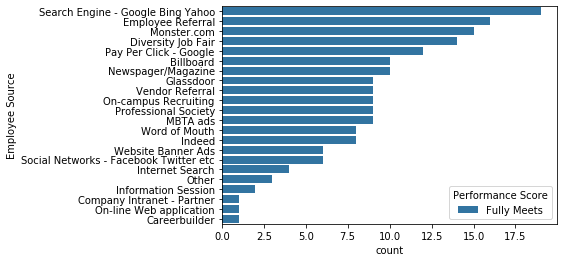

In [26]:
sns.barplot(x='count', y='Employee Source', hue = 'Performance Score',
           data=perf_by_source[perf_by_source['Performance Score'] == 'Fully Meets'])

[Text(0, 0, 'Employee Referral'),
 Text(0, 0, 'Diversity Job Fair'),
 Text(0, 0, 'Search Engine - Google Bing Yahoo'),
 Text(0, 0, 'Monster.com'),
 Text(0, 0, 'Pay Per Click - Google'),
 Text(0, 0, 'Professional Society'),
 Text(0, 0, 'Newspager/Magazine'),
 Text(0, 0, 'MBTA ads'),
 Text(0, 0, 'Billboard'),
 Text(0, 0, 'Vendor Referral'),
 Text(0, 0, 'Glassdoor'),
 Text(0, 0, 'Word of Mouth'),
 Text(0, 0, 'Website Banner Ads'),
 Text(0, 0, 'On-campus Recruiting'),
 Text(0, 0, 'Social Networks - Facebook Twitter etc')]

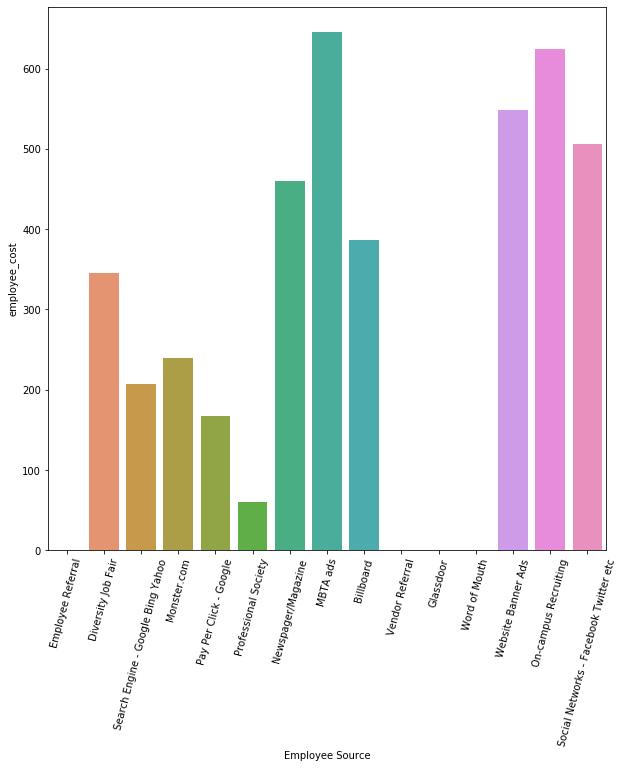

In [27]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Employee Source', y='employee_cost',
           data=best_res.iloc[:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

[Text(0, 0, 'Production       '),
 Text(0, 0, 'Admin Offices'),
 Text(0, 0, 'IT/IS'),
 Text(0, 0, 'Executive Office'),
 Text(0, 0, 'Software Engineering'),
 Text(0, 0, 'Sales')]

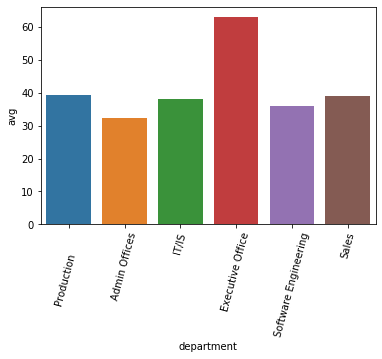

In [28]:
ax = sns.barplot(x='department', y='avg',
           data=avg_age_by_dep)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

## Рекомендации Hr-отделу
1) Принаёме работников рекомендуется отбратить внимание на такие источники кадров как:
'Employee Referral', 'Diversity Job Fair','Search Engine - Google Bing Yahoo', 'Monster.com', 'Pay Per Click - Google', 'Professional Society', 'Newspager/Magazine', 'Billboard', 'Vendor Referral', 'Glassdoor'. Именно из этих источников нанимаются самые эффективные работники и стоимость наёма из этих източников приемлема.

2) В целом женщин в компании больше чем мужчин, если политика компании направленна на балансе мужчин и женщин, то рекомендуется нанимать больше мужчин. Эффективность работника практически не зависит от пола.

3) Средний возраст работников в компании равен 39 годам, примерно же в этом восрасте работник в среднем достигает оптимальной производительности труда. Соотвествено рекомендуется нанимать сотрудников чуть младше среднего возраста, чтобы к 39 годам они достигали оптимальной производительности труда.

4) Сотрудники проработившие в компании меньше 1400 дней нуждаются в более тщательном присмотре и помощи, для улучшения их производительности труда.

5) Менеджеры Kelley Spirea и David Stanley, могут провести тренниг для остальных, так как они хорошо справляются со своими обязаностями.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [26]:
import requests
from datetime import datetime, timedelta
import pandas as pd

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [8]:
vk_token = '83c3dba80bac7054fcb9687307fb2643dcb968ec0deba1d8e20f4a1d02d384fa63f4a2d542edac6a42de5'
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=100&v=5.92'
response = getjson(url)

print(response)

{'response': {'count': 7474, 'items': [{'id': 49380, 'from_id': -66669811, 'owner_id': -66669811, 'date': 1579186894, 'marked_as_ads': 0, 'post_type': 'post', 'text': 'Photoshop, 3D, знание основ фотографии – какие еще навыки нужны для успешной работы в CG-индустрии? Поговорили с основателем всемирно известной студии Lightfarm Милтоном Менезесом о любимых проектах, эволюции идеи и ее реализации, а также о том, что лучше для дизайнера — офис или фриланс. Читайте в статье.\n\n#Статья_Skillbox #Skillbox_дизайн', 'attachments': [{'type': 'link', 'link': {'url': 'https://skillbox.ru/media/design/interview_menezes/?utm_source=skillbox.media&utm_medium=vk&utm_campaign=profession-artist&utm_content=interview&utm_term=interviewmenezes', 'title': 'Большая часть наших проектов граничит с понятием невозможного: Милтон Менезес о работе в CG', 'caption': 'skillbox.ru', 'description': 'Милтон работал в Новой Зеландии, открыл студию в Бразилии и сделал её одной из самых известных, основал школу и орга

In [21]:
like, data, comm, text = [], [], [], []

Спарсим текст постовб количество лайков и комментов, и время публикации за период с декабря 2018 года по настоящее время. Так как интернет динамичная среда, лучше использовать актуальные данные(за последний год).

In [22]:
for i in range(0, 1001, 100):
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset={}&count=100&v=5.92'.format(i)
    response = getjson(url)
    for post in response['response']['items']:
        text.append(post['text'])
        like.append(post['likes']['count'])
        comm.append(post['comments']['count'])
        data.append((datetime.fromtimestamp(post['date']) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S'))

In [23]:
dici = {'like': like, 'data': data, 'comm': comm, 'text': text}

Формируем датафрейм

In [27]:
df5 = pd.DataFrame(dici)

In [142]:
df5.tail()

,like,data,comm,text,hour,tag
1095,63,2018-12-11 18:00:11,2,Недавно наши партнёры из SidorinLab Дмитрий Си...,18,Nan
1096,65,2018-12-11 15:30:05,1,Снова настало время рубрики «Книга недели от S...,15,Nan
1097,85,2018-12-10 22:30:02,0,Исход диалога с клиентом зависит не только от ...,22,Nan
1098,51,2018-12-10 20:30:02,0,Начинаем неделю с классной подборки email-расс...,20,Nan
1099,27,2018-12-10 18:39:34,4,"Мы подготовили небольшой проект, чтобы помочь ...",18,Nan


In [36]:
df5['data'] = pd.to_datetime(df5['data'])

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
like    1100 non-null int64
data    1100 non-null datetime64[ns]
comm    1100 non-null int64
text    1100 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.5+ KB


In [40]:
df5['hour'] = df5.data.dt.hour

Групируем данные по часу публикации. Считаем количество постов и находим среднее количество лайков и комментариев на один пост, опубликованных в определенный час.

In [77]:
activi = df5.groupby('hour').sum()

In [78]:
activi['cou'] = df5.groupby('hour').text.count()

In [79]:
activi['like'] = activi['like']/activi.cou
activi['comm'] = activi['comm']/activi.cou

In [80]:
activi

,like,comm,cou
hour,,,
0,64.620690,2.682759,145
1,60.483871,7.161290,31
2,31.583333,1.979167,48
3,26.333333,0.833333,6
4,15.000000,0.000000,1
13,73.000000,5.000000,1
14,44.250000,5.375000,8
15,107.720930,16.069767,86
16,52.500000,17.478261,46


In [87]:
df5.to_csv('vk')

С помощь регулярного выражения находим тэги содержащие слово 'Skillbox'. Что бы выбрать рубрики для анализа.

In [95]:
import re
j = []
reg_expr = r'#Skill\w+'
reg_expr1 = r'#\w+box'
for i in df5.text:
    for i in re.findall(reg_expr, i):
        if i not in j:
            j.append(i)
    for i in re.findall(reg_expr1, i):
        if i not in j:
            j.append(i)
j

['#Skillbox_дизайн',
 '#Skillbox',
 '#Skillbox_игра',
 '#Skillbox_программирование',
 '#Skillbox_маркетинг',
 '#Расписание_Skillbox',
 '#В_закладки_Skillbox',
 '#Skillbox_управление',
 '#Вам_слово_Skillbox',
 '#Skillbохмаркетинг',
 '#Конкурс_Skillbox',
 '#Skillbox_OFFF',
 '#Skillboxвдохновляет',
 '#Skillboxдизайн',
 '#Skillboxподкаст',
 '#Skillbox_Сострадамус',
 '#Skillbохдизайн',
 '#Статья_Skillbox',
 '#Skillbox_вдохновляет',
 '#Skillbox_Симпсоны',
 '#Skillbox_вопросы',
 '#Подкасты_Skillbox',
 '#Skillbox_в_закладки',
 '#Анонс_Skillbox',
 '#Лекторий_Skillbox',
 '#Черная_пятница_Skillbox',
 '#Распродажа_Skillbox',
 '#Skillbox_образование',
 '#Защита_дипломов_Skillbox',
 '#Skillbox_кейс',
 '#Skillbox_Маркетинг',
 '#Skillbox_взакладки',
 '#Skillbox_конкурс',
 '#Skillbox_акция',
 '#Программирование_Skillbox',
 '#Skillbox_Sreda',
 '#skillbox',
 '#Инфографика_Skillbox',
 '#Игра_Skillbox',
 '#Cоветпрепода_Skillbox',
 '#Skillbox_Дизайн',
 '#Skillbox_Pinkman',
 '#Стачка_Skillbox',
 '#Skillbox_к

Я решил проалализировать посты принадлежащие проффессиям (дизайн, программирование, маркетинг, управление). Формируем столбец 'tag' и маркируем посты по принадлежности к профессии.

In [115]:
df5['tag'] = 'Nan'

In [116]:
for i in df5.text:
    if '#Skillbox_дизайн' in i or '#Skillboxдизайн' in i or '#Skillbox_Дизайн' in i:
        df5.loc[df5.text == i,'tag'] = '#Skillbox_дизайн'
    elif '#Skillbox_программирование' in i or '#Программирование_Skillbox' in i:
        df5.loc[df5.text == i,'tag'] = '#Skillbox_программирование'
    elif '#Skillbox_маркетинг' in i or '#Skillbохмаркетинг' in i or '#Skillbox_Маркетинг' in i:
        df5.loc[df5.text == i,'tag'] = '#Skillbox_маркетинг'
    elif '#Skillbox_управление' in i or '#Skillbохуправление' in i:
        df5.loc[df5.text == i,'tag'] = '#Skillbox_управление'

In [117]:
df5.tag.unique()

array(['#Skillbox_дизайн', 'Nan', '#Skillbox_программирование',
       '#Skillbox_маркетинг', '#Skillbox_управление'], dtype=object)

In [140]:
tag = df5[df5.tag != 'Nan'].groupby('tag').sum()
tag

,like,comm,hour
tag,,,
#Skillbox_дизайн,10928,1348,2343
#Skillbox_маркетинг,4178,516,691
#Skillbox_программирование,3342,380,701
#Skillbox_управление,2533,349,680


Считаем вовлеченность пользователей в зависимости от профессии.

In [141]:
tag['amount_of_posts'] = df5[df5.tag != 'Nan'].tag.value_counts()
tag['like'] = tag['like']/tag['amount_of_posts']
tag['comm'] = tag['comm']/tag['amount_of_posts']
tag = tag.drop(['hour'], axis=1)
tag

,like,comm,amount_of_posts
tag,,,
#Skillbox_дизайн,73.837838,9.108108,148
#Skillbox_маркетинг,66.317460,8.190476,63
#Skillbox_программирование,66.840000,7.600000,50
#Skillbox_управление,57.568182,7.931818,44


Рекомендации:
1) Больше всего лайкают посты опубликованные в 15.00, 18.00, 17.00, меньше всего после часа ночи.
2) Больше всего комментируют посты опубликованные в 16.00, 15.00, 17.00 и в 21.00, меньше всего в 3 и 4 утра.
3) Оптимальное время для постов 15.00, 17.00, 16.00 и 21.00 (При расчете того что комментирование, ценется выше чем лайк, как метрика вовлеченности). Лучшее время 15.00.
4) В зависимости от проффесионального уклона, аудитории больше нравится дизайн, затем программирование, маркетинг и управление.
5) Охотнее всего обсуждают дизайн, затем маркетинг, управление и в конце программирование.
6) Для привлечение новой аудитории рекомендуется использовать посты про дизайн.